# Quantifying the Effect of Model Fit on Predictability Estimates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


sns.set_style("ticks")

In [2]:
# Import data for every combination of sigma and phi 

# threshold for possibly filtering the results, e.g. threshold = 2.6 when only want to look at non-chaotic behavior
threshold = 3.3

errors_train_single_r_low_sigma_temp = pd.read_csv("../final_results/training_sensitivity_single_r_low_sigma.csv")
errors_test_single_r_low_sigma_temp = pd.read_csv("../final_results/testing_sensitivity_single_r_low_sigma.csv")

errors_train_single_r_low_sigma = errors_train_single_r_low_sigma_temp[errors_train_single_r_low_sigma_temp["r"]<=threshold]
errors_test_single_r_low_sigma = errors_test_single_r_low_sigma_temp[errors_train_single_r_low_sigma_temp["r"]<=threshold]

errors_train_single_r_medium_sigma_temp = pd.read_csv("../final_results/training_sensitivity_single_r_medium_sigma.csv")
errors_test_single_r_medium_sigma_temp = pd.read_csv("../final_results/testing_sensitivity_single_r_medium_sigma.csv")

errors_train_single_r_medium_sigma = errors_train_single_r_medium_sigma_temp[errors_train_single_r_medium_sigma_temp["r"]<=threshold]
errors_test_single_r_medium_sigma = errors_test_single_r_medium_sigma_temp[errors_train_single_r_medium_sigma_temp["r"]<=threshold]

errors_train_single_r_high_sigma_temp = pd.read_csv("../final_results/training_sensitivity_single_r_high_sigma.csv")
errors_test_single_r_high_sigma_temp = pd.read_csv("../final_results/testing_sensitivity_single_r_high_sigma.csv")

errors_train_single_r_high_sigma = errors_train_single_r_high_sigma_temp[errors_train_single_r_high_sigma_temp["r"]<=threshold]
errors_test_single_r_high_sigma = errors_test_single_r_high_sigma_temp[errors_train_single_r_high_sigma_temp["r"]<=threshold]

errors_train_single_r_low_phi_temp = pd.read_csv("../final_results/training_sensitivity_single_r_low_phi.csv")
errors_test_single_r_low_phi_temp = pd.read_csv("../final_results/testing_sensitivity_single_r_low_phi.csv")

errors_train_single_r_low_phi = errors_train_single_r_low_phi_temp[errors_train_single_r_low_phi_temp["r"]<=threshold]
errors_test_single_r_low_phi = errors_test_single_r_low_phi_temp[errors_train_single_r_low_phi_temp["r"]<=threshold]

errors_train_single_r_medium_phi_temp = pd.read_csv("../final_results/training_sensitivity_single_r_medium_phi.csv")
errors_test_single_r_medium_phi_temp = pd.read_csv("../final_results/testing_sensitivity_single_r_medium_phi.csv")

errors_train_single_r_medium_phi = errors_train_single_r_medium_phi_temp[errors_train_single_r_medium_phi_temp["r"]<=threshold]
errors_test_single_r_medium_phi = errors_test_single_r_medium_phi_temp[errors_train_single_r_medium_phi_temp["r"]<=threshold]

errors_train_single_r_high_phi_temp = pd.read_csv("../final_results/training_sensitivity_single_r_high_phi.csv")
errors_test_single_r_high_phi_temp = pd.read_csv("../final_results/testing_sensitivity_single_r_high_phi.csv")

errors_train_single_r_high_phi = errors_train_single_r_high_phi_temp[errors_train_single_r_high_phi_temp["r"]<=threshold]
errors_test_single_r_high_phi = errors_test_single_r_high_phi_temp[errors_train_single_r_high_phi_temp["r"]<=threshold]

errors_train_multi_r_low_sigma_temp = pd.read_csv("../final_results/training_sensitivity_multi_r_low_sigma.csv")
errors_test_multi_r_low_sigma_temp = pd.read_csv("../final_results/testing_sensitivity_multi_r_low_sigma.csv")

errors_train_multi_r_low_sigma = errors_train_multi_r_low_sigma_temp[errors_train_multi_r_low_sigma_temp["r"]<=threshold]
errors_test_multi_r_low_sigma = errors_test_multi_r_low_sigma_temp[errors_train_multi_r_low_sigma_temp["r"]<=threshold]

errors_train_multi_r_medium_sigma_temp = pd.read_csv("../final_results/training_sensitivity_multi_r_medium_sigma.csv")
errors_test_multi_r_medium_sigma_temp = pd.read_csv("../final_results/testing_sensitivity_multi_r_medium_sigma.csv")

errors_train_multi_r_medium_sigma = errors_train_multi_r_medium_sigma_temp[errors_train_multi_r_medium_sigma_temp["r"]<=threshold]
errors_test_multi_r_medium_sigma = errors_test_multi_r_medium_sigma_temp[errors_train_multi_r_medium_sigma_temp["r"]<=threshold]

errors_train_multi_r_high_sigma_temp = pd.read_csv("../final_results/training_sensitivity_multi_r_high_sigma.csv")
errors_test_multi_r_high_sigma_temp = pd.read_csv("../final_results/testing_sensitivity_multi_r_high_sigma.csv")

errors_train_multi_r_high_sigma = errors_train_multi_r_high_sigma_temp[errors_train_multi_r_high_sigma_temp["r"]<=threshold]
errors_test_multi_r_high_sigma = errors_test_multi_r_high_sigma_temp[errors_train_multi_r_high_sigma_temp["r"]<=threshold]

errors_train_multi_r_low_phi_temp = pd.read_csv("../final_results/training_sensitivity_multi_r_low_phi.csv")
errors_test_multi_r_low_phi_temp = pd.read_csv("../final_results/testing_sensitivity_multi_r_low_phi.csv")

errors_train_multi_r_low_phi = errors_train_multi_r_low_phi_temp[errors_train_multi_r_low_phi_temp["r"]<=threshold]
errors_test_multi_r_low_phi = errors_test_multi_r_low_phi_temp[errors_train_multi_r_low_phi_temp["r"]<=threshold]

errors_train_multi_r_medium_phi_temp = pd.read_csv("../final_results/training_sensitivity_multi_r_medium_phi.csv")
errors_test_multi_r_medium_phi_temp = pd.read_csv("../final_results/testing_sensitivity_multi_r_medium_phi.csv")

errors_train_multi_r_medium_phi = errors_train_multi_r_medium_phi_temp[errors_train_multi_r_medium_phi_temp["r"]<=threshold]
errors_test_multi_r_medium_phi = errors_test_multi_r_medium_phi_temp[errors_train_multi_r_medium_phi_temp["r"]<=threshold]

errors_train_multi_r_high_phi_temp = pd.read_csv("../final_results/training_sensitivity_multi_r_high_phi.csv")
errors_test_multi_r_high_phi_temp = pd.read_csv("../final_results/testing_sensitivity_multi_r_high_phi.csv")

errors_train_multi_r_high_phi = errors_train_multi_r_high_phi_temp[errors_train_multi_r_high_phi_temp["r"]<=threshold]
errors_test_multi_r_high_phi = errors_test_multi_r_high_phi_temp[errors_train_multi_r_high_phi_temp["r"]<=threshold]


errors_train_multi_r_zero_temp = pd.read_csv("../final_results/training_sensitivity_multi_r.csv")
errors_test_multi_r_zero_temp = pd.read_csv("../final_results/testing_sensitivity_multi_r.csv")

errors_train_multi_r_zero = errors_train_multi_r_zero_temp[errors_train_multi_r_zero_temp["r"]<=threshold]
errors_test_multi_r_zero = errors_test_multi_r_zero_temp[errors_train_multi_r_zero_temp["r"]<=threshold]

### Trenf of WPE with r

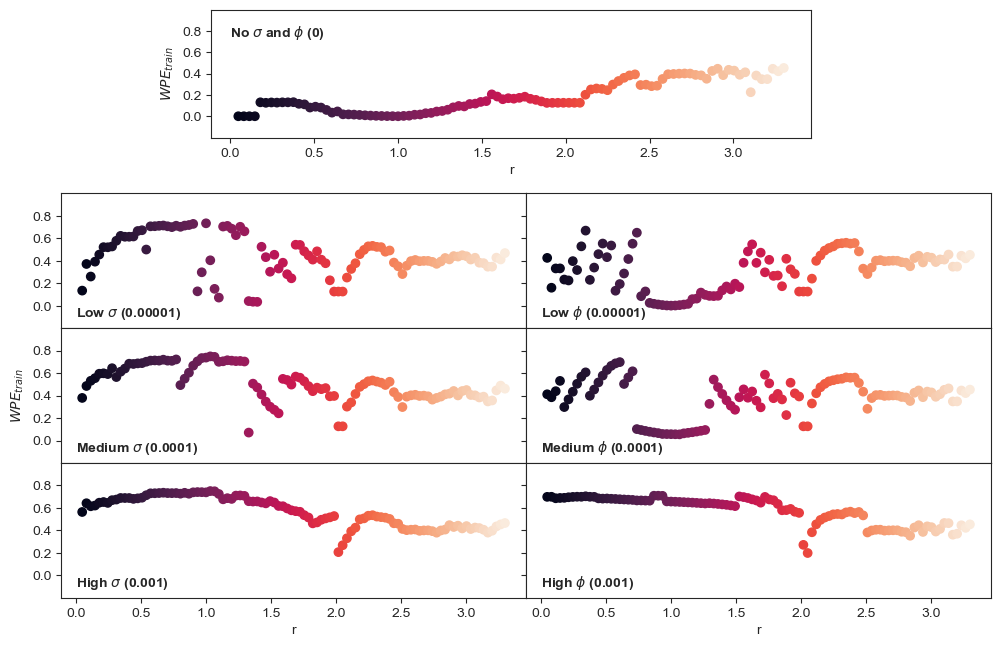

In [3]:
gs_top = plt.GridSpec(4, 2,top=0.95,left=0.25,right=0.75)
gs_base = plt.GridSpec(4, 2, hspace=0,wspace=0)

fig = plt.figure(figsize=(12,7))

ax1 = fig.add_subplot(gs_top[0,:])
ax21 = fig.add_subplot(gs_base[1,0])
ax22 = fig.add_subplot(gs_base[1,1])
ax31 = fig.add_subplot(gs_base[2,0])
ax32 = fig.add_subplot(gs_base[2,1])
ax41 = fig.add_subplot(gs_base[3,0])
ax42 = fig.add_subplot(gs_base[3,1])


ax1.scatter(errors_test_multi_r_zero["r"],errors_train_multi_r_zero["wpe_train"],label="WPE",c=errors_test_multi_r_zero["r"])
ax1.set_xlabel("r")
ax1.set_ylabel(r"$WPE_{train}$")
ax1.text(0,0.75,r"No $\sigma$ and $\phi$ (0)",weight='bold')
ax1.set_ylim([-0.2,1])
ax1.set_yticks([0,0.2,0.4,0.6,0.8])

ax21.scatter(errors_test_multi_r_low_sigma["r"],errors_train_multi_r_low_sigma["wpe_train"],label="WPE",c=errors_test_multi_r_low_sigma["r"])
ax21.text(0,-0.1,r"Low $\sigma$ (0.00001)",weight='bold')
ax21.set_ylim([-0.2,1])
ax21.set_yticks([0.0,0.2,0.4,0.6,0.8])

ax31.scatter(errors_test_multi_r_medium_sigma["r"],errors_train_multi_r_medium_sigma["wpe_train"],label="WPE",c=errors_test_multi_r_medium_sigma["r"])
ax31.set_ylabel(r"$WPE_{train}$")
ax31.text(0,-0.1,r"Medium $\sigma$ (0.0001)",weight='bold')
ax31.set_ylim([-0.2,1])
ax31.set_yticks([0.0,0.2,0.4,0.6,0.8])

ax41.scatter(errors_test_multi_r_high_sigma["r"],errors_train_multi_r_high_sigma["wpe_train"],label="WPE",c=errors_test_multi_r_high_sigma["r"])
ax41.set_xlabel("r")
ax41.text(0,-0.1,r"High $\sigma$ (0.001)",weight='bold')
ax41.set_ylim([-0.2,1])
ax41.set_yticks([0.0,0.2,0.4,0.6,0.8])

ax22.scatter(errors_test_multi_r_low_phi["r"],errors_train_multi_r_low_phi["wpe_train"],label="WPE",c=errors_test_multi_r_low_phi["r"])
ax22.text(0,-0.1,r"Low $\phi$ (0.00001)",weight='bold')
ax22.set_ylim([-0.2,1])
ax22.set_yticks([0.0,0.2,0.4,0.6,0.8])

ax32.scatter(errors_test_multi_r_medium_phi["r"],errors_train_multi_r_medium_phi["wpe_train"],label="WPE",c=errors_test_multi_r_medium_phi["r"])
ax32.text(0,-0.1,r"Medium $\phi$ (0.0001)",weight='bold')
ax32.set_ylim([-0.2,1])
ax32.set_yticks([0.0,0.2,0.4,0.6,0.8])

ax42.scatter(errors_test_multi_r_high_phi["r"],errors_train_multi_r_high_phi["wpe_train"],label="WPE",c=errors_test_multi_r_high_phi["r"])
ax42.set_xlabel("r")
ax42.text(0,-0.1,r"High $\phi$ (0.001)",weight='bold')
ax42.set_ylim([-0.2,1])
ax42.set_yticks([0.0,0.2,0.4,0.6,0.8])

for ax in [ax22,ax32,ax42]:
    plt.setp(ax.get_yticklabels(), visible=False)



for ax in [ax21,ax22,ax31,ax32]:
    plt.setp(ax.get_xticklabels(), visible=False)


### Trend of MAE with WPE for Ricker models

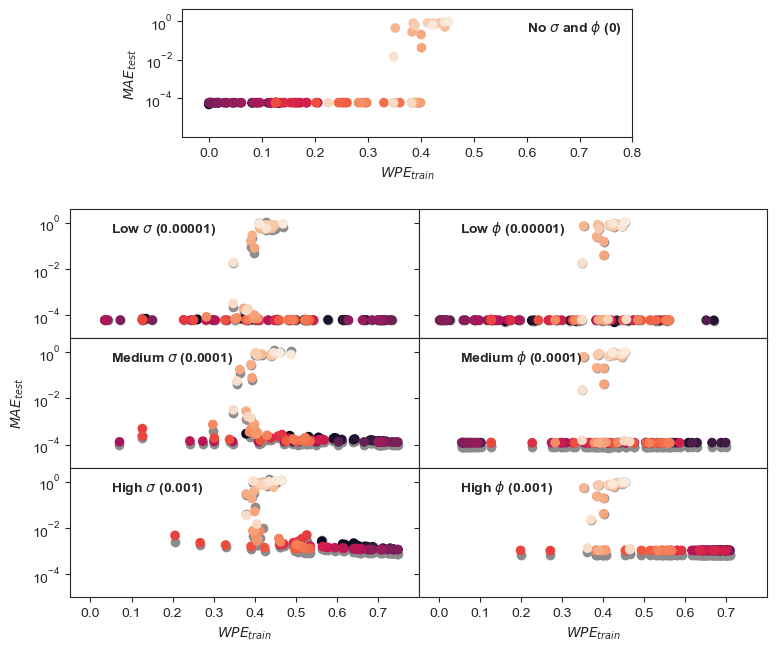

In [4]:
gs_top = plt.GridSpec(4, 2,top=0.95,left=0.25,right=0.75)
gs_base = plt.GridSpec(4, 2, hspace=0,wspace=0,top=0.85)

fig = plt.figure(figsize=(9,7))

ax1 = fig.add_subplot(gs_top[0,:])
ax21 = fig.add_subplot(gs_base[1,0])
ax22 = fig.add_subplot(gs_base[1,1])
ax31 = fig.add_subplot(gs_base[2,0])
ax32 = fig.add_subplot(gs_base[2,1])
ax41 = fig.add_subplot(gs_base[3,0])
ax42 = fig.add_subplot(gs_base[3,1])


ax1.scatter(errors_train_multi_r_zero["wpe_train"],errors_test_multi_r_zero["yricker_sto_test_mae"],c=errors_test_multi_r_zero["r"])
ax1.text(0.6,0.3,r"No $\sigma$ and $\phi$ (0)",weight="bold")
ax1.set_xlabel(r"$WPE_{train}$")
ax1.set_ylabel(r"$MAE_{test}$")
ax1.set_xlim([-0.05,0.8])
ax1.set_yscale("log")
ax1.set_ylim([10**-6,4*10**0])
ax1.set_yticks([10**-4,10**-2,10**0])

ax21.scatter(errors_train_multi_r_low_sigma["wpe_train"],errors_test_multi_r_low_sigma["yricker_det_test_mae"],color=(0.54902, 0.54902, 0.54902))
ax21.scatter(errors_train_multi_r_low_sigma["wpe_train"],errors_test_multi_r_low_sigma["yricker_sto_test_mae"],c=errors_test_multi_r_low_sigma["r"])
ax21.text(0.05,4*10**-1,r"Low $\sigma$ (0.00001)",weight="bold")
ax21.set_xlabel(r"$WPE$")
ax21.set_xlim([-0.05,0.8])
ax21.set_ylim([10**-5,4*10**0])
ax21.set_yscale("log")
ax21.set_yticks([10**-4,10**-2,10**0])

ax31.scatter(errors_train_multi_r_medium_sigma["wpe_train"],errors_test_multi_r_medium_sigma["yricker_det_test_mae"],color=(0.54902, 0.54902, 0.54902))
ax31.scatter(errors_train_multi_r_medium_sigma["wpe_train"],errors_test_multi_r_medium_sigma["yricker_sto_test_mae"],c=errors_test_multi_r_medium_sigma["r"])
ax31.text(0.05,4*10**-1,r"Medium $\sigma$ (0.0001)",weight="bold")
ax31.set_xlabel(r"$WPE$")
ax31.set_ylabel(r"$MAE_{test}$")
ax31.set_xlim([-0.05,0.8])
ax31.set_ylim([10**-5,4*10**0])
ax31.set_yscale("log")
ax31.set_yticks([10**-4,10**-2,10**0])

ax41.scatter(errors_train_multi_r_high_sigma["wpe_train"],errors_test_multi_r_high_sigma["yricker_det_test_mae"],color=(0.54902, 0.54902, 0.54902))
ax41.scatter(errors_train_multi_r_high_sigma["wpe_train"],errors_test_multi_r_high_sigma["yricker_sto_test_mae"],c=errors_test_multi_r_high_sigma["r"])
ax41.set_xlabel(r"$WPE_{train}$")
ax41.text(0.05,4*10**-1,r"High $\sigma$ (0.001)",weight="bold")
ax41.set_xlim([-0.05,0.8])
ax41.set_ylim([10**-5,4*10**0])
ax41.set_yscale("log")
ax41.set_yticks([10**-4,10**-2,10**0])
ax41.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])

ax22.scatter(errors_train_multi_r_low_phi["wpe_train"],errors_test_multi_r_low_phi["yricker_det_test_mae"],color=(0.54902, 0.54902, 0.54902))
ax22.scatter(errors_train_multi_r_low_phi["wpe_train"],errors_test_multi_r_low_phi["yricker_sto_test_mae"],c=errors_test_multi_r_low_sigma["r"])
ax22.text(0.05,4*10**-1,r"Low $\phi$ (0.00001)",weight="bold")
ax22.set_xlabel(r"$WPE$")
ax22.set_xlim([-0.05,0.8])
ax22.set_ylim([10**-5,4*10**0])
ax22.set_yscale("log")
ax22.set_yticks([10**-4,10**-2,10**0])

ax32.scatter(errors_train_multi_r_medium_phi["wpe_train"],errors_test_multi_r_medium_phi["yricker_det_test_mae"],color=(0.54902, 0.54902, 0.54902))
ax32.scatter(errors_train_multi_r_medium_phi["wpe_train"],errors_test_multi_r_medium_phi["yricker_sto_test_mae"],c=errors_test_multi_r_medium_phi["r"])
ax32.text(0.05,4*10**-1,r"Medium $\phi$ (0.0001)",weight="bold")
ax32.set_xlabel(r"$WPE$")
ax32.set_xlim([-0.05,0.8])
ax32.set_ylim([10**-5,4*10**0])
ax32.set_yscale("log")
ax32.set_yticks([10**-4,10**-2,10**0])

ax42.scatter(errors_train_multi_r_high_phi["wpe_train"],errors_test_multi_r_high_phi["yricker_det_test_mae"],color=(0.54902, 0.54902, 0.54902))
ax42.scatter(errors_train_multi_r_high_phi["wpe_train"],errors_test_multi_r_high_phi["yricker_sto_test_mae"],c=errors_test_multi_r_high_phi["r"])
ax42.text(0.05,4*10**-1,r"High $\phi$ (0.001)",weight="bold")
ax42.set_xlabel(r"$WPE_{train}$")
ax42.set_xlim([-0.05,0.8])
ax42.set_ylim([10**-5,4*10**0])
ax42.set_yscale("log")
ax42.set_yticks([10**-4,10**-2,10**0])
ax42.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])


for ax in [ax22,ax32,ax42]:
    plt.setp(ax.get_yticklabels(), visible=False)


for ax in [ax21,ax22,ax31,ax32]:
    plt.setp(ax.get_xticklabels(), visible=False)

### Trend of MAE with WPE for S-Map

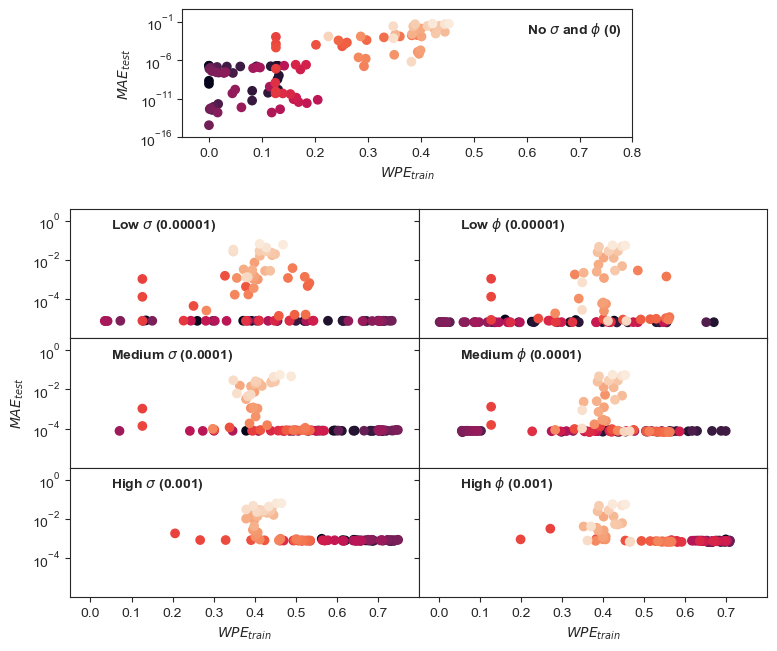

In [5]:
gs_top = plt.GridSpec(4, 2,top=0.95,left=0.25,right=0.75)
gs_base = plt.GridSpec(4, 2, hspace=0,wspace=0,top=0.85)

fig = plt.figure(figsize=(9,7))

ax1 = fig.add_subplot(gs_top[0,:])
ax21 = fig.add_subplot(gs_base[1,0])
ax22 = fig.add_subplot(gs_base[1,1])
ax31 = fig.add_subplot(gs_base[2,0])
ax32 = fig.add_subplot(gs_base[2,1])
ax41 = fig.add_subplot(gs_base[3,0])
ax42 = fig.add_subplot(gs_base[3,1])


ax1.scatter(errors_train_multi_r_zero["wpe_train"],errors_test_multi_r_zero["ysmap_test_mae"],c=errors_test_multi_r_zero["r"])
ax1.text(0.6,0.003,r"No $\sigma$ and $\phi$ (0)",weight="bold")
ax1.set_xlabel(r"$WPE_{train}$")
ax1.set_ylabel(r"$MAE_{test}$")
ax1.set_xlim([-0.05,0.8])
ax1.set_yscale("log")
ax1.set_ylim([10**-16,4*10**0])

ax21.scatter(errors_train_multi_r_low_sigma["wpe_train"],errors_test_multi_r_low_sigma["ysmap_test_mae"],c=errors_test_multi_r_low_sigma["r"])
ax21.text(0.05,4*10**-1,r"Low $\sigma$ (0.00001)",weight="bold")
ax21.set_xlabel(r"$WPE$")
ax21.set_xlim([-0.05,0.8])
ax21.set_ylim([10**-6,4*10**0])
ax21.set_yscale("log")
ax21.set_yticks([10**-4,10**-2,10**0])

ax31.scatter(errors_train_multi_r_medium_sigma["wpe_train"],errors_test_multi_r_medium_sigma["ysmap_test_mae"],c=errors_test_multi_r_medium_sigma["r"])
ax31.text(0.05,4*10**-1,r"Medium $\sigma$ (0.0001)",weight="bold")
ax31.set_xlabel(r"$WPE$")
ax31.set_ylabel(r"$MAE_{test}$")
ax31.set_xlim([-0.05,0.8])
ax31.set_ylim([10**-6,4*10**0])
ax31.set_yscale("log")
ax31.set_yticks([10**-4,10**-2,10**0])

ax41.scatter(errors_train_multi_r_high_sigma["wpe_train"],errors_test_multi_r_high_sigma["ysmap_test_mae"],c=errors_test_multi_r_high_sigma["r"])
ax41.set_xlabel(r"$WPE_{train}$")
ax41.text(0.05,4*10**-1,r"High $\sigma$ (0.001)",weight="bold")
ax41.set_xlim([-0.05,0.8])
ax41.set_ylim([10**-6,4*10**0])
ax41.set_yscale("log")
ax41.set_yticks([10**-4,10**-2,10**0])
ax41.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])

ax22.scatter(errors_train_multi_r_low_phi["wpe_train"],errors_test_multi_r_low_phi["ysmap_test_mae"],c=errors_test_multi_r_low_sigma["r"])
ax22.text(0.05,4*10**-1,r"Low $\phi$ (0.00001)",weight="bold")
ax22.set_xlabel(r"$WPE$")
ax22.set_xlim([-0.05,0.8])
ax22.set_ylim([10**-6,4*10**0])
ax22.set_yscale("log")
ax22.set_yticks([10**-4,10**-2,10**0])

ax32.scatter(errors_train_multi_r_medium_phi["wpe_train"],errors_test_multi_r_medium_phi["ysmap_test_mae"],c=errors_test_multi_r_medium_phi["r"])
ax32.text(0.05,4*10**-1,r"Medium $\phi$ (0.0001)",weight="bold")
ax32.set_xlabel(r"$WPE$")
ax32.set_xlim([-0.05,0.8])
ax32.set_ylim([10**-6,4*10**0])
ax32.set_yscale("log")
ax32.set_yticks([10**-4,10**-2,10**0])

ax42.scatter(errors_train_multi_r_high_phi["wpe_train"],errors_test_multi_r_high_phi["ysmap_test_mae"],c=errors_test_multi_r_high_phi["r"])
ax42.text(0.05,4*10**-1,r"High $\phi$ (0.001)",weight="bold")
ax42.set_xlabel(r"$WPE_{train}$")
ax42.set_xlim([-0.05,0.8])
ax42.set_ylim([10**-6,4*10**0])
ax42.set_yscale("log")
ax42.set_yticks([10**-4,10**-2,10**0])
ax42.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])


for ax in [ax22,ax32,ax42]:
    plt.setp(ax.get_yticklabels(), visible=False)


for ax in [ax21,ax22,ax31,ax32]:
    plt.setp(ax.get_xticklabels(), visible=False)


### Trend of fh with WPE for Ricker models

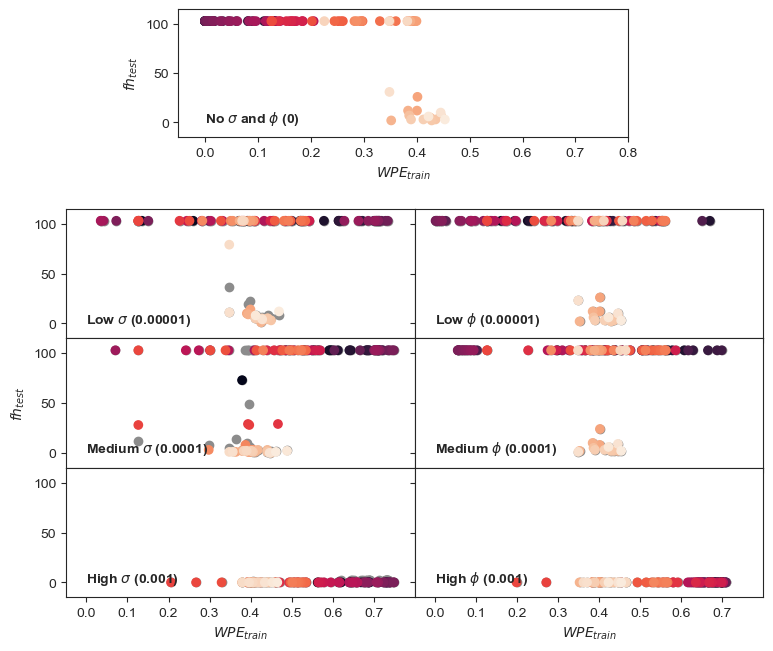

In [6]:
gs_top = plt.GridSpec(4, 2,top=0.95,left=0.25,right=0.75)
gs_base = plt.GridSpec(4, 2, hspace=0,wspace=0,top=0.85)

fig = plt.figure(figsize=(9,7))

ax1 = fig.add_subplot(gs_top[0,:])
ax21 = fig.add_subplot(gs_base[1,0])
ax22 = fig.add_subplot(gs_base[1,1])
ax31 = fig.add_subplot(gs_base[2,0])
ax32 = fig.add_subplot(gs_base[2,1])
ax41 = fig.add_subplot(gs_base[3,0])
ax42 = fig.add_subplot(gs_base[3,1])


ax1.scatter(errors_train_multi_r_zero["wpe_train"],errors_test_multi_r_zero["yricker_sto_test_fh"],c=errors_test_multi_r_zero["r"])
ax1.text(0,0.3,r"No $\sigma$ and $\phi$ (0)",weight="bold")
ax1.set_xlabel(r"$WPE_{train}$")
ax1.set_ylabel(r"$fh_{test}$")
ax1.set_xlim([-0.05,0.8])
ax1.set_ylim([-15,115])

ax21.scatter(errors_train_multi_r_low_sigma["wpe_train"],errors_test_multi_r_low_sigma["yricker_det_test_fh"],color=(0.54902, 0.54902, 0.54902))
ax21.scatter(errors_train_multi_r_low_sigma["wpe_train"],errors_test_multi_r_low_sigma["yricker_sto_test_fh"],c=errors_test_multi_r_low_sigma["r"])
ax21.text(0,4*10**-1,r"Low $\sigma$ (0.00001)",weight="bold")
ax21.set_xlabel(r"$WPE$")
ax21.set_xlim([-0.05,0.8])
ax21.set_ylim([-15,115])

ax31.scatter(errors_train_multi_r_medium_sigma["wpe_train"],errors_test_multi_r_medium_sigma["yricker_det_test_fh"],color=(0.54902, 0.54902, 0.54902))
ax31.scatter(errors_train_multi_r_medium_sigma["wpe_train"],errors_test_multi_r_medium_sigma["yricker_sto_test_fh"],c=errors_test_multi_r_medium_sigma["r"])
ax31.text(0,4*10**-1,r"Medium $\sigma$ (0.0001)",weight="bold")
ax31.set_xlabel(r"$WPE$")
ax31.set_ylabel(r"$fh_{test}$")
ax31.set_xlim([-0.05,0.8])
ax31.set_ylim([-15,115])

ax41.scatter(errors_train_multi_r_high_sigma["wpe_train"],errors_test_multi_r_high_sigma["yricker_det_test_fh"],color=(0.54902, 0.54902, 0.54902))
ax41.scatter(errors_train_multi_r_high_sigma["wpe_train"],errors_test_multi_r_high_sigma["yricker_sto_test_fh"],c=errors_test_multi_r_high_sigma["r"])
ax41.set_xlabel(r"$WPE_{train}$")
ax41.text(0,4*10**-1,r"High $\sigma$ (0.001)",weight="bold")
ax41.set_xlim([-0.05,0.8])
ax41.set_ylim([-15,115])
ax41.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])

ax22.scatter(errors_train_multi_r_low_phi["wpe_train"],errors_test_multi_r_low_phi["yricker_det_test_fh"],color=(0.54902, 0.54902, 0.54902))
ax22.scatter(errors_train_multi_r_low_phi["wpe_train"],errors_test_multi_r_low_phi["yricker_sto_test_fh"],c=errors_test_multi_r_low_sigma["r"])
ax22.text(0,4*10**-1,r"Low $\phi$ (0.00001)",weight="bold")
ax22.set_xlabel(r"$WPE$")
ax22.set_xlim([-0.05,0.8])
ax22.set_ylim([-15,115])

ax32.scatter(errors_train_multi_r_medium_phi["wpe_train"],errors_test_multi_r_medium_phi["yricker_det_test_fh"],color=(0.54902, 0.54902, 0.54902))
ax32.scatter(errors_train_multi_r_medium_phi["wpe_train"],errors_test_multi_r_medium_phi["yricker_sto_test_fh"],c=errors_test_multi_r_medium_phi["r"])
ax32.text(0,4*10**-1,r"Medium $\phi$ (0.0001)",weight="bold")
ax32.set_xlabel(r"$WPE$")
ax32.set_xlim([-0.05,0.8])
ax32.set_ylim([-15,115])

ax42.scatter(errors_train_multi_r_high_phi["wpe_train"],errors_test_multi_r_high_phi["yricker_det_test_fh"],color=(0.54902, 0.54902, 0.54902))
ax42.scatter(errors_train_multi_r_high_phi["wpe_train"],errors_test_multi_r_high_phi["yricker_sto_test_fh"],c=errors_test_multi_r_high_phi["r"])
ax42.text(0,4*10**-1,r"High $\phi$ (0.001)",weight="bold")
ax42.set_xlabel(r"$WPE_{train}$")
ax42.set_xlim([-0.05,0.8])
ax42.set_ylim([-15,115])
ax42.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])


for ax in [ax22,ax32,ax42]:
    plt.setp(ax.get_yticklabels(), visible=False) 


for ax in [ax21,ax22,ax31,ax32]:
    plt.setp(ax.get_xticklabels(), visible=False)



### Trend of fh with WPE for S-Map

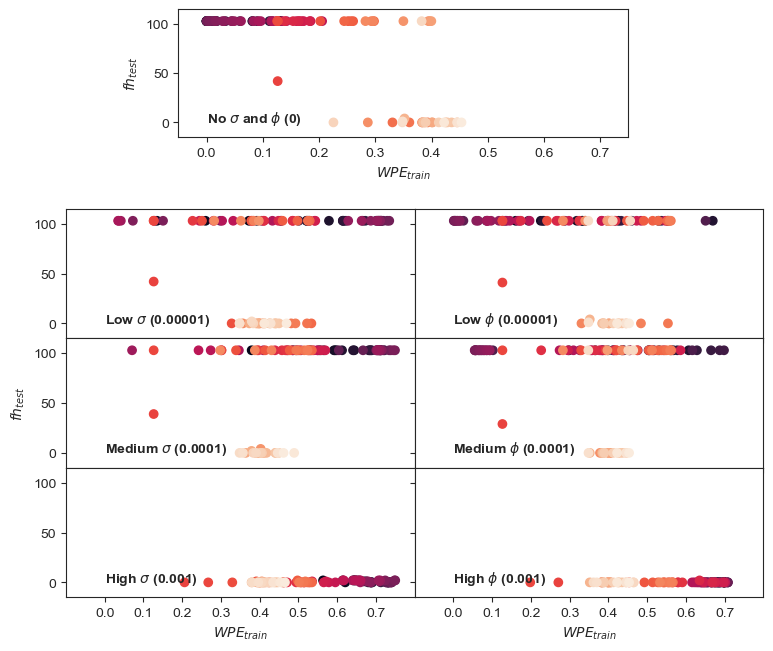

In [7]:
gs_top = plt.GridSpec(4, 2,top=0.95,left=0.25,right=0.75)
gs_base = plt.GridSpec(4, 2, hspace=0,wspace=0,top=0.85)

fig = plt.figure(figsize=(9,7))

ax1 = fig.add_subplot(gs_top[0,:])
ax21 = fig.add_subplot(gs_base[1,0])
ax22 = fig.add_subplot(gs_base[1,1])
ax31 = fig.add_subplot(gs_base[2,0])
ax32 = fig.add_subplot(gs_base[2,1])
ax41 = fig.add_subplot(gs_base[3,0])
ax42 = fig.add_subplot(gs_base[3,1])


ax1.scatter(errors_train_multi_r_zero["wpe_train"],errors_test_multi_r_zero["ysmap_test_fh"],c=errors_test_multi_r_zero["r"])
ax1.text(0,0.3,r"No $\sigma$ and $\phi$ (0)",weight="bold")
ax1.set_xlabel(r"$WPE_{train}$")
ax1.set_ylabel(r"$fh_{test}$")
ax1.set_xlim([-0.05,0.75])
ax1.set_ylim([-15,115])

ax21.scatter(errors_train_multi_r_low_sigma["wpe_train"],errors_test_multi_r_low_sigma["ysmap_test_fh"],c=errors_test_multi_r_low_sigma["r"])
ax21.text(0,4*10**-1,r"Low $\sigma$ (0.00001)",weight="bold")
ax21.set_xlabel(r"$WPE$")
ax21.set_xlim([-0.1,0.8])
ax21.set_ylim([-15,115])

ax31.scatter(errors_train_multi_r_medium_sigma["wpe_train"],errors_test_multi_r_medium_sigma["ysmap_test_fh"],c=errors_test_multi_r_medium_sigma["r"])
ax31.text(0,4*10**-1,r"Medium $\sigma$ (0.0001)",weight="bold")
ax31.set_xlabel(r"$WPE$")
ax31.set_ylabel(r"$fh_{test}$")
ax31.set_xlim([-0.1,0.8])
ax31.set_ylim([-15,115])

ax41.scatter(errors_train_multi_r_high_sigma["wpe_train"],errors_test_multi_r_high_sigma["ysmap_test_fh"],c=errors_test_multi_r_high_sigma["r"])
ax41.set_xlabel(r"$WPE_{train}$")
ax41.text(0,4*10**-1,r"High $\sigma$ (0.001)",weight="bold")
ax41.set_xlim([-0.1,0.8])
ax41.set_ylim([-15,115])
ax41.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])

ax22.scatter(errors_train_multi_r_low_phi["wpe_train"],errors_test_multi_r_low_phi["ysmap_test_fh"],c=errors_test_multi_r_low_sigma["r"])
ax22.text(0,4*10**-1,r"Low $\phi$ (0.00001)",weight="bold")
ax22.set_xlabel(r"$WPE$")
ax22.set_xlim([-0.1,0.8])
ax22.set_ylim([-15,115])


ax32.scatter(errors_train_multi_r_medium_phi["wpe_train"],errors_test_multi_r_medium_phi["ysmap_test_fh"],c=errors_test_multi_r_medium_phi["r"])
ax32.text(0,4*10**-1,r"Medium $\phi$ (0.0001)",weight="bold")
ax32.set_xlabel(r"$WPE$")
ax32.set_xlim([-0.1,0.8])
ax32.set_ylim([-15,115])

ax42.scatter(errors_train_multi_r_high_phi["wpe_train"],errors_test_multi_r_high_phi["ysmap_test_fh"],c=errors_test_multi_r_high_phi["r"])
ax42.text(0,4*10**-1,r"High $\phi$ (0.001)",weight="bold")
ax42.set_xlabel(r"$WPE_{train}$")
ax42.set_xlim([-0.1,0.8])
ax42.set_ylim([-15,115])
ax42.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])


for ax in [ax22,ax32,ax42]:
    plt.setp(ax.get_yticklabels(), visible=False)


for ax in [ax21,ax22,ax31,ax32]:
    plt.setp(ax.get_xticklabels(), visible=False)
